<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-Model/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_2.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [42]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [44]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_2/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_2/validation',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

Found 158 files belonging to 2 classes.
Found 95 files belonging to 2 classes.


In [45]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_3/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/archive_3/validation',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
    )

Found 1792 files belonging to 2 classes.
Found 1208 files belonging to 2 classes.


In [46]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [47]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
56/56 [==============================] - 12s 127ms/step - loss: 2.7642 - accuracy: 0.7171 - val_loss: 1.5906 - val_accuracy: 0.5985
Epoch 2/10
56/56 [==============================] - 8s 140ms/step - loss: 0.8553 - accuracy: 0.7924 - val_loss: 7.5586 - val_accuracy: 0.4760
Epoch 3/10
56/56 [==============================] - 8s 134ms/step - loss: 0.4864 - accuracy: 0.8192 - val_loss: 6.5826 - val_accuracy: 0.4735
Epoch 4/10
56/56 [==============================] - 11s 199ms/step - loss: 0.2731 - accuracy: 0.8901 - val_loss: 2.4968 - val_accuracy: 0.5604
Epoch 5/10
56/56 [==============================] - 8s 146ms/step - loss: 0.3001 - accuracy: 0.8878 - val_loss: 2.6607 - val_accuracy: 0.5025
Epoch 6/10
56/56 [==============================] - 8s 137ms/step - loss: 0.2305 - accuracy: 0.8923 - val_loss: 0.9293 - val_accuracy: 0.7086
Epoch 7/10
56/56 [==============================] - 8s 142ms/step - loss: 0.1947 - accuracy: 0.9258 - val_loss: 1.1407 - val_accuracy: 0.6349
Epoc

In [51]:
model.evaluate(validation_ds )

38/38 [==============================] - 2s 48ms/step - loss: 0.4759 - accuracy: 0.8825


[0.47593915462493896, 0.8824503421783447]

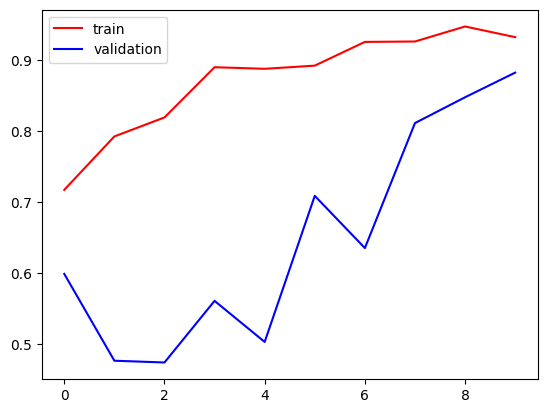

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

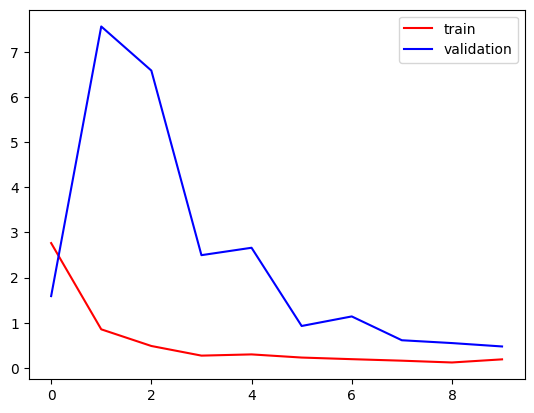

In [53]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [54]:
model.save("./Model.h5")

In [55]:
import cv2
import pandas as pd

import skimage
from random import randint
import numpy as np
import PIL
import matplotlib.pyplot as plt


In [56]:
Image= cv2.imread('/content/archive_2/train/Image1.jpg')

In [57]:
image=PIL.Image.open('/content/archive_2/train/Image1.jpg')
image_array= np.array(image)
float_array = image_array.astype(np.float32)
print(image_array)
print(float_array.dtype)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
float32


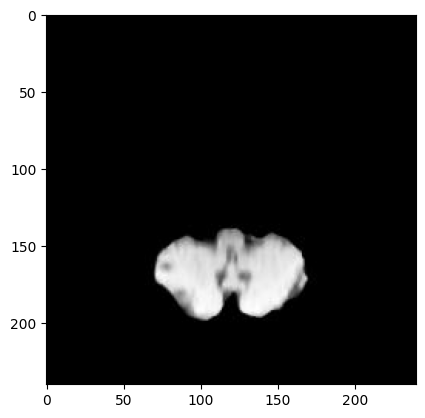

In [58]:
plt.imshow(Image)


In [59]:
Image.shape

(240, 240, 3)

In [60]:
Image = cv2.resize(Image,(256,256))

In [61]:
test_input = Image.reshape((1,256,256,3))

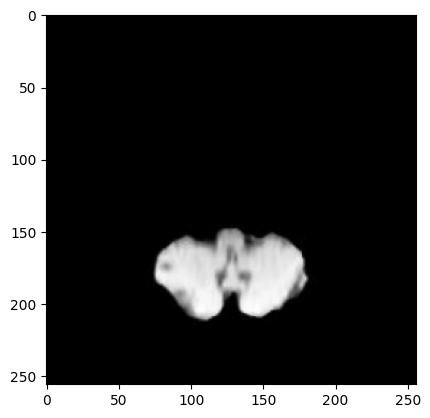

In [62]:
plt.imshow(Image)

In [63]:
model.predict(test_input)

1/1 [==============================] - 0s 105ms/step


array([[1.]], dtype=float32)

In [64]:
Image= cv2.imread('/content/archive_2/train/Image3.jpg')

In [65]:
image1=PIL.Image.open('/content/archive_2/train/Image3.jpg')
image1_array= np.array(image1)
float_array = image_array.astype(np.float32)
print(image1_array)
print(float_array.dtype)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
float32


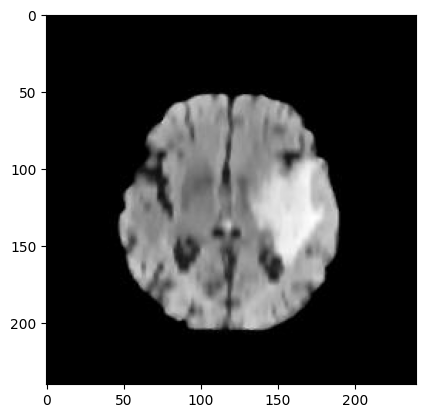

In [66]:
plt.imshow(Image)

In [67]:
Image.shape

(240, 240, 3)

In [68]:
Image = cv2.resize(Image,(256,256))


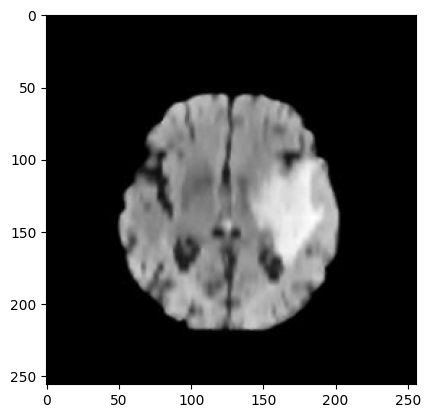

In [69]:
plt.imshow(Image)

In [70]:
test_input = Image.reshape((1,256,256,3))

In [71]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)